In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# import libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load the iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# selectiong only the petal features
df_petal = df[['petal length (cm)','petal width (cm)']]
df_petal.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0.5, 1.0, 'Petal Length vs Petal Width')

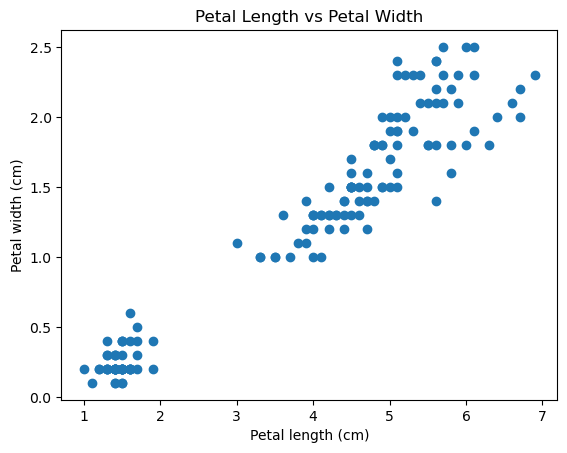

In [5]:
# visualizing the data using scatter plot
plt.scatter(df_petal['petal length (cm)'],df_petal['petal width (cm)'])
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal Length vs Petal Width')

In [6]:
# create K Means object
km = KMeans(n_clusters=3)
km

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [7]:
# fit and predict the data
y_pred = km.fit_predict(df_petal)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


In [8]:
df_petal['clusters'] = y_pred
df_petal.head()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_14456\887997865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petal['clusters'] = y_pred


,petal length (cm),petal width (cm),clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


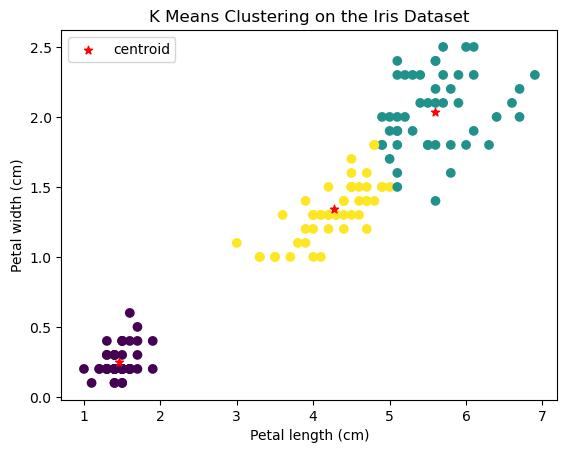

In [9]:
# visualize clusters to see what K Means learned
plt.scatter(df_petal['petal length (cm)'],df_petal['petal width (cm)'],c=df_petal['clusters'])
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('K Means Clustering on the Iris Dataset')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='red', marker='*', label='centroid')
plt.legend()

In [10]:
scaler = MinMaxScaler()
scaler.fit(df_petal[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df_petal[['petal length (cm)']])

scaler.fit(df_petal[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df_petal[['petal width (cm)']])

df_petal.head()

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [11]:
# create K Means object again ,then fit and predict the scaled data
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df_petal)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
df_petal['clusters'] = y_pred
df_petal.head()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_14456\887997865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petal['clusters'] = y_pred


,petal length (cm),petal width (cm),clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


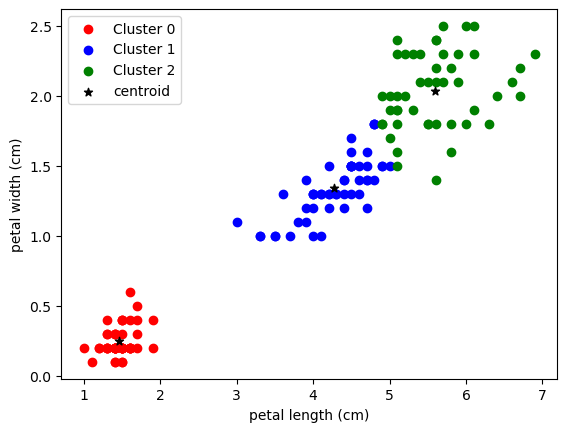

In [13]:
# scatter plot 
df_petal0 = df_petal[df_petal.clusters==0]
df_petal1 = df_petal[df_petal.clusters==1]
df_petal2 = df_petal[df_petal.clusters==2]

plt.scatter(df_petal0['petal length (cm)'], df_petal0['petal width (cm)'], label='Cluster 0', color='red')
plt.scatter(df_petal1['petal length (cm)'], df_petal1['petal width (cm)'], label='Cluster 1', color='blue')
plt.scatter(df_petal2['petal length (cm)'], df_petal2['petal width (cm)'], label='Cluster 2', color='green')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='centroid')
plt.legend()